# Analyse results per group


In [1]:
import pickle
import matplotlib as plt
import os
from utils.basie_class import *
from scipy.stats import ttest_ind
import re

### Information

In [2]:
# path to results folder
foldpath ='/Users/emiliedolne/Downloads/all'

In [3]:
# list of each group
ctrl=['ANDRU', 'SELGI', 'DUNPE', 'FARRO']
ad=['HEIBE', 'TALRU', 'THOAN2', 'JACAN','JONG', 'CHACH', 'DOLST', 'HEIBE', 'HONJO', 'BLAAD', 'BROMA']
ivppa=['BLAAD', 'CHACH', 'JONGW']
# ivppa=[]

In [4]:
# get a list of all patients in the results
listpatient=[]
for fold in os.listdir(foldpath):
    if '.DS_Store' not in fold:
        listpatient.append(''.join(re.findall('[A-Z]', fold)))

listpatient=list(set(listpatient))

### Load data

In [5]:
# load ctrl data
listctrl=[]

i=0
for patientID in ctrl:
    listctrl.append([])
    for fold in os.listdir(foldpath):
        if patientID in fold:
            listctrl[i].append(fold)
    if len(listctrl[i])==1:
        newfoldpath=os.path.join(foldpath, listctrl[i][0])
        listctrl[i]=[]
        for fold in os.listdir(newfoldpath):
            if patientID in fold:
                listctrl[i].append(fold)
    i+=1

In [6]:
# load ad data
listad=[]

i=0
for patientID in ad:
    listad.append([])
    for fold in os.listdir(foldpath):
        if patientID in fold:
            listad[i].append(fold)
    if len(listad[i])==1:
        newfoldpath=os.path.join(foldpath, listad[i][0])
        listad[i]=[]
        for fold in os.listdir(newfoldpath):
            if patientID in fold:
                listad[i].append(fold)
    i+=1

In [7]:
# load ivppa data
listivppa=[]

i=0
for patientID in ivppa:
    listivppa.append([])
    for fold in os.listdir(foldpath):
        if patientID in fold:
            listivppa[i].append(fold)
    if len(listivppa[i])==1:
        newfoldpath=os.path.join(foldpath, listivppa[i][0])
        listivppa[i]=[]
        for fold in os.listdir(newfoldpath):
            if patientID in fold:
                listivppa[i].append(fold)
    i+=1

## Start plots

### Overlapping psychometric functions

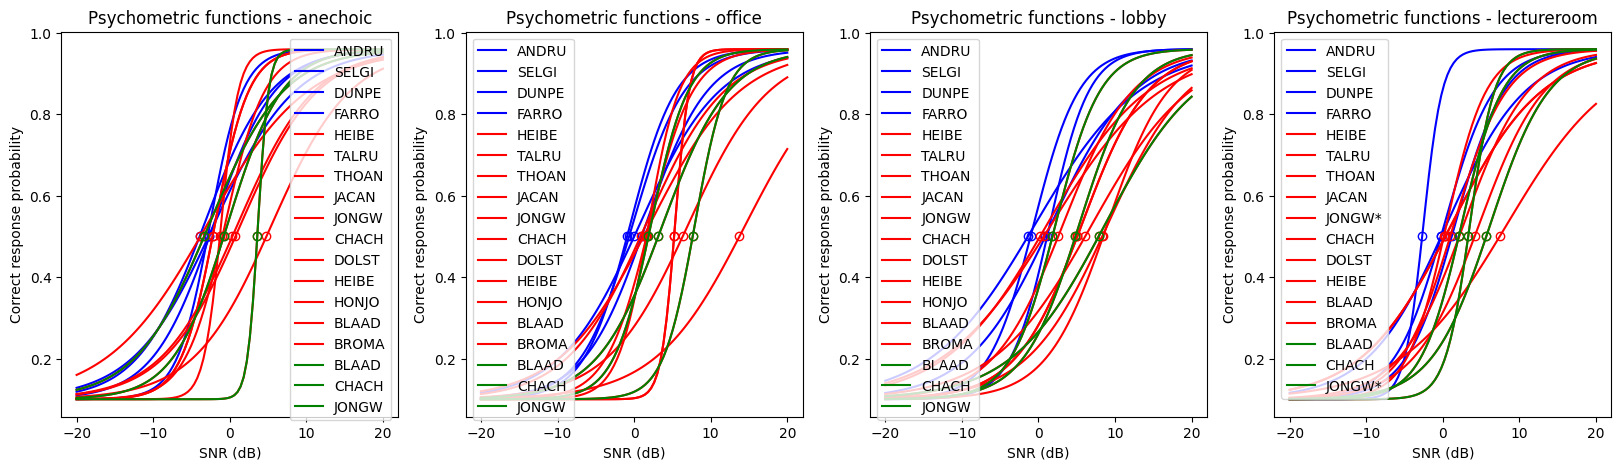

In [8]:
roomlist=['anechoic','office', 'lobby', 'lectureroom']

fig, axs=plt.subplots(nrows=1, ncols=len(roomlist), figsize=(5*len(roomlist),5))

iplot=0
for room in roomlist:
    plt.sca(axs[iplot])
    colorlist=['b','r','g','gold', 'darkgrey']
    colorlistflash=['aqua', 'mistyrose', 'lime', 'yellow', 'lightgrey']
    filelist=[]
    ptntlist=[]
    timinglist=[]

    listctrlperroom=[]
    for i in listctrl:
        for j in i:
            if room in j:
                listctrlperroom.append(j)
    listadperroom=[]
    for i in listad:
        for j in i:
            if room in j:
                listadperroom.append(j)
    listivppaperroom=[]
    for i in listivppa:
        for j in i:
            if room in j:
                listivppaperroom.append(j)

    ptntctrllist=[]  
    estimatectrllist=[]

    for ptnt in listctrlperroom:
        ptntctrllist.append(ptnt[0:5])
        for path, subdirs, files in os.walk(os.path.join(foldpath, ptnt)):
            for name in files:
                if 'pkl' in name:
                    if 'paused' in name:
                        print('Warning: patient ' + ptntctrllist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                        ptntctrllist[-1]+='*'
                    else:
                        timinglist.append(path.split('/')[-1])
                        with open(os.path.join(path,name), 'rb') as f:
                            [estimate, __, __, __, __]=pickle.load(f)
                            estimatectrllist.append(estimate)
    for i in range(len(estimatectrllist)):
        estimatectrllist[i].plot('f',0)
        plt.gca().lines[-2].set_color(colorlist[0])
        plt.gca().lines[-1].set_color(colorlist[0])

    ptntadlist=[]  
    estimateadlist=[]
    for ptnt in listadperroom:
        ptntadlist.append(ptnt[0:5])
        for path, subdirs, files in os.walk(os.path.join(foldpath, ptnt)):
            for name in files:
                if 'pkl' in name:
                    if 'paused' in name:
                        print('Warning: patient ' + ptntadlist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                        ptntadlist[-1]+='*'
                    else:
                        timinglist.append(path.split('/')[-1])
                        with open(os.path.join(path,name), 'rb') as f:
                            [estimate, __,__, __, __]=pickle.load(f)
                            estimateadlist.append(estimate)
    for i in range(len(estimateadlist)):
        estimateadlist[i].plot('f',0)
        plt.gca().lines[-2].set_color(colorlist[1])
        plt.gca().lines[-1].set_color(colorlist[1])

    ptntivppalist=[]  
    estimateivppalist=[]
    for ptnt in listivppaperroom:
        ptntivppalist.append(ptnt[0:5])
        for path, subdirs, files in os.walk(os.path.join(foldpath, ptnt)):
            for name in files:
                if 'pkl' in name:
                    if 'paused' in name:
                        print('Warning: patient ' + ptntivppalist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                        ptntivppalist[-1]+='*'
                    else:
                        timinglist.append(path.split('/')[-1])
                        with open(os.path.join(path,name), 'rb') as f:
                            [estimate, __,__, __, __]=pickle.load(f)
                            estimateivppalist.append(estimate)
    for i in range(len(estimateivppalist)):
        estimateivppalist[i].plot('f',0)
        plt.gca().lines[-2].set_color(colorlist[2])
        plt.gca().lines[-1].set_color(colorlist[2])

    ptntlist=ptntctrllist[:]+ ptntadlist[:]+ ptntivppalist[:]

    ax = plt.gca()
    plt.title('Psychometric functions - ' + room)
    handles, labels = ax.get_legend_handles_labels()
    (ax.legend(handles, ptntlist));
    iplot+=1
plt.savefig('psycfunc_allpatientspergroup.pdf', bbox_inches='tight')

### Mean psychometric functions

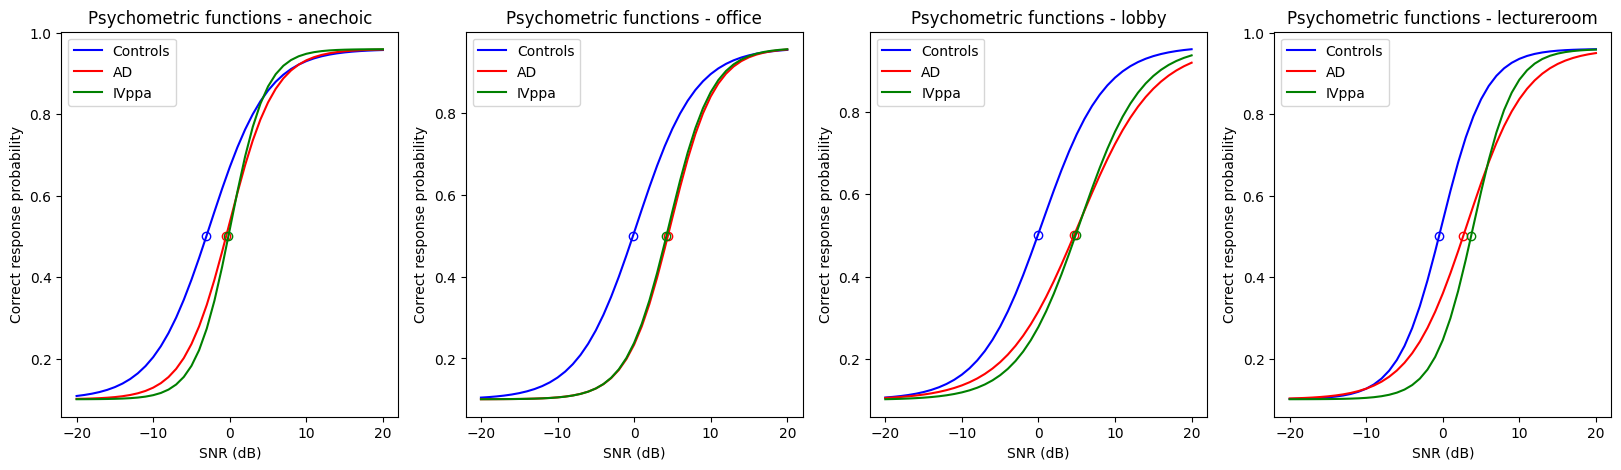

In [9]:
roomlist=['anechoic','office', 'lobby', 'lectureroom']

fig, axs=plt.subplots(nrows=1, ncols=len(roomlist), figsize=(5*len(roomlist),5))

iplot=0
availsnr=np.atleast_2d(np.linspace(-20, 20, 41))

srtctrl=[]
varsrtctrl=[]
slopectrl=[]
varslopectrl=[]
srtad=[]
varsrtad=[]
slopead=[]
varslopead=[]
srtivppa=[]
varsrtivppa=[]
slopeivppa=[]
varslopeivppa=[]

for room in roomlist:
    plt.sca(axs[iplot])
    colorlist=['b','r','g','gold', 'darkgrey']
    colorlistflash=['aqua', 'mistyrose', 'lime', 'yellow', 'lightgrey']
    filelist=[]
    ptntlist=[]
    timinglist=[]

    listctrlperroom=[]
    for i in listctrl:
        for j in i:
            if room in j:
                listctrlperroom.append(j)
    listadperroom=[]
    for i in listad:
        for j in i:
            if room in j:
                listadperroom.append(j)
    listivppaperroom=[]
    for i in listivppa:
        for j in i:
            if room in j:
                listivppaperroom.append(j)

    ptntctrllist=[]  
    estimatectrllist=[]

    for ptnt in listctrlperroom:
        ptntctrllist.append(ptnt[0:5])
        for path, subdirs, files in os.walk(os.path.join(foldpath, ptnt)):
            for name in files:
                if 'pkl' in name:
                    if 'paused' in name:
                        print('Warning: patient ' + ptntctrllist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                        ptntctrllist[-1]+='*'
                    else:
                        timinglist.append(path.split('/')[-1])
                        with open(os.path.join(path,name), 'rb') as f:
                            [estimate, __,__, __, __]=pickle.load(f)
                            estimatectrllist.append(estimate)
    
    listsrtctrl=[]
    listslopectrl=[]
    listvarsrtctrl=[]
    listvarslopectrl=[]
    for i in range(len(estimatectrllist)):
        listsrtctrl.append(estimatectrllist[i].summary()[-1][-1][3])
        listslopectrl.append(estimatectrllist[i].summary()[-1][-1][4])
        listvarsrtctrl.append(estimatectrllist[i].summary()[-1][-1][5])
        listvarslopectrl.append(estimatectrllist[i].summary()[-1][-1][6])
        
    srtctrl.append(listsrtctrl)
    slopectrl.append(listslopectrl)
    varsrtctrl.append(listvarsrtctrl)
    varslopectrl.append(listvarslopectrl)

    params=estimatectrllist[0].summary()[0]
    meansrtctrl=np.mean(listsrtctrl)
    meanslopectrl=np.e**(np.mean(listslopectrl))

    estplot=v_psychofunc('', np.array([params[0], [meansrtctrl], [meanslopectrl], params[1], params[2], [1]]),
                availsnr.T)
    plt.plot(estplot[1], estplot[0],color=colorlist[0], label="Estimated model {}".format('ctrl'+room))
    plt.plot(meansrtctrl, params[0],'o', color=colorlist[0], markerfacecolor='none')

#     plt.gca().lines[-2].set_color(colorlist[0])
    plt.gca().lines[-1].set_color(colorlist[0])
    
    ptntadlist=[]  
    estimateadlist=[]
    for ptnt in listadperroom:
        ptntadlist.append(ptnt[0:5])
        for path, subdirs, files in os.walk(os.path.join(foldpath, ptnt)):
            for name in files:
                if 'pkl' in name:
                    if 'paused' in name:
                        print('Warning: patient ' + ptntadlist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                        ptntadlist[-1]+='*'
                    else:
                        timinglist.append(path.split('/')[-1])
                        with open(os.path.join(path,name), 'rb') as f:
                            [estimate, __,__, __, __]=pickle.load(f)
                            estimateadlist.append(estimate)
    listsrtad=[]
    listvarsrtad=[]
    listslopead=[]
    listvarslopead=[]
    for i in range(len(estimateadlist)):
        listsrtad.append(estimateadlist[i].summary()[-1][-1][3])
        listslopead.append(estimateadlist[i].summary()[-1][-1][4])
        listvarsrtad.append(estimateadlist[i].summary()[-1][-1][5])
        listvarslopead.append(estimateadlist[i].summary()[-1][-1][6])
    srtad.append(listsrtad)
    varsrtad.append(listvarsrtad)
    slopead.append(listslopead)
    varslopead.append(listvarslopead)

    params=estimateadlist[0].summary()[0]
    meansrtad=np.mean(listsrtad)
    meanslopead=np.e**(np.mean(listslopead))

    estplot=v_psychofunc('', np.array([params[0], [meansrtad], [meanslopead], params[1], params[2], [1]]),
                 availsnr.T)
    plt.plot(estplot[1], estplot[0],color=colorlist[1], label="Estimated model {}".format('ad'+room))
    plt.plot(meansrtad, params[0],'o', color=colorlist[1], markerfacecolor='none')
#     plt.gca().lines[-2].set_color(colorlist[1])
    plt.gca().lines[-1].set_color(colorlist[1])

    if ivppa!=[]:
        ptntivppalist=[]  
        estimateivppalist=[]
        for ptnt in listivppaperroom:
            ptntivppalist.append(ptnt[0:5])
            for path, subdirs, files in os.walk(os.path.join(foldpath, ptnt)):
                for name in files:
                    if 'pkl' in name:
                        if 'paused' in name:
                            print('Warning: patient ' + ptntivppalist[-1] +' took a pause in '+ ptnt[5:len(ptnt)])
                            ptntivppalist[-1]+='*'
                        else:
                            timinglist.append(path.split('/')[-1])
                            with open(os.path.join(path,name), 'rb') as f:
                                [estimate, __,__, __, __]=pickle.load(f)
                                estimateivppalist.append(estimate)
        listsrtivppa=[]
        listvarsrtivppa=[]
        listslopeivppa=[]
        listvarslopeivppa=[]
        for i in range(len(estimateivppalist)):
            listsrtivppa.append(estimateivppalist[i].summary()[-1][-1][3])
            listslopeivppa.append(estimateivppalist[i].summary()[-1][-1][4])
            listvarsrtivppa.append(estimateivppalist[i].summary()[-1][-1][5])
            listvarslopeivppa.append(estimateivppalist[i].summary()[-1][-1][6])
        srtivppa.append(listsrtivppa)
        varsrtivppa.append(listvarsrtivppa)
        slopeivppa.append(listslopeivppa)
        varslopeivppa.append(listvarslopeivppa)
        
        params=estimateivppalist[0].summary()[0]
        meansrtivppa=np.mean(listsrtivppa)
        meanslopeivpaa=np.e**(np.mean(listslopeivppa))

        estplot=v_psychofunc('', np.array([params[0], [meansrtivppa], [meanslopeivpaa], params[1], params[2], [1]]),
                    availsnr.T)
        plt.plot(estplot[1], estplot[0],color=colorlist[2], label="Estimated model {}".format('ivppa'+room))
        plt.plot(meansrtivppa, params[0],'o', color=colorlist[2], markerfacecolor='none')

    ptntlist=['Controls', 'AD', 'IVppa']
    ax = plt.gca()
    plt.title('Psychometric functions - ' + room)
    handles, labels = ax.get_legend_handles_labels()
    (ax.legend(handles,ptntlist));
    plt.xlabel('SNR (dB)')
    plt.ylabel('Correct response probability')
    iplot+=1
plt.savefig('psycfunc_meanpergroup.pdf', bbox_inches='tight')

### Box plots

---- anechoic ----
Control vs AD:  TtestResult(statistic=-1.8525485579578225, pvalue=0.08678182956319208, df=13.0)
Control vs ivppa:  TtestResult(statistic=-1.6648235580612347, pvalue=0.15683004230273043, df=5.0)
AD vs ivppa:  TtestResult(statistic=-0.15962305642000243, pvalue=0.8758332686989894, df=12.0)
---- office ----
Control vs AD:  TtestResult(statistic=-2.2857522749343735, pvalue=0.03969374804376531, df=13.0)
Control vs ivppa:  TtestResult(statistic=-2.818217956273293, pvalue=0.037186546094982086, df=5.0)
AD vs ivppa:  TtestResult(statistic=0.07755530067626557, pvalue=0.9394599521759402, df=12.0)
---- lobby ----
Control vs AD:  TtestResult(statistic=-3.0231363295397387, pvalue=0.009793266859237038, df=13.0)
Control vs ivppa:  TtestResult(statistic=-2.9953448452113287, pvalue=0.03026072999994039, df=5.0)
AD vs ivppa:  TtestResult(statistic=-0.10310176019906007, pvalue=0.9195851890975189, df=12.0)
---- lectureroom ----
Control vs AD:  TtestResult(statistic=-2.3259010153845305, pva

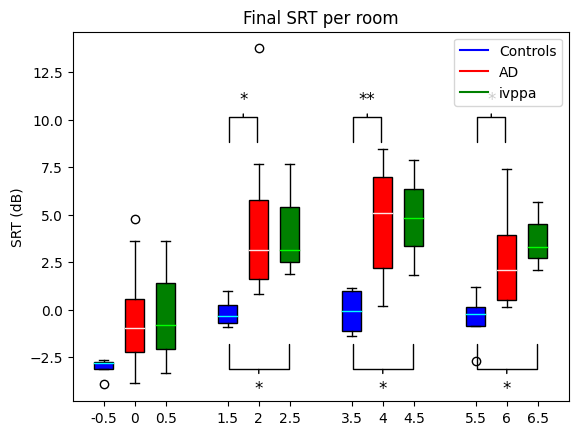

In [48]:
ax = plt.axes()
if ivppa!=[]:
    bplot1=plt.boxplot(srtctrl, positions=[-0.5, 1.5, 3.5, 5.5], widths=0.3, patch_artist=True)
    bplot2=plt.boxplot(srtad, positions=[0, 2, 4, 6], widths=0.3,patch_artist=True)
    bplot3=plt.boxplot(srtivppa, positions=[0.5, 2.5, 4.5, 6.5], widths=0.3,patch_artist=True)
    bplots=(bplot1, bplot2, bplot3)
else:
    bplot1=plt.boxplot(srtctrl, positions=[-0.3, 1.7, 3.7, 5.7], widths=0.3,patch_artist=True)
    bplot2=plt.boxplot(srtad, positions=[.3, 2.3, 4.3, 6.3], widths=0.3,patch_artist=True)
    bplots=(bplot1, bplot2)

i=0;
for bplot in bplots:
    for patch in bplot['boxes']:
        patch.set_facecolor(colorlist[i])
    for median in bplot['medians']:
        median.set_color(colorlistflash[i])
    i+=1

# plt.xticks(ticks=[0,2,4,6],labels=roomlist,rotation=0)  # Rotate labels for better readability
plt.title('Final SRT per room')
plt.ylabel('SRT (dB)')

if ivppa==[]:
    i=0
    for room in roomlist:
        res = ttest_ind(srtctrl[i], srtad[i], equal_var=True, alternative='two-sided')
        if res[1]<0.05:
            signlable=rf'$t={-res[0]:2.2f}$, *'
            if res[1]<0.01:
                signlable=rf'$t={-res[0]:2.2f}$, **'
            ax.annotate(signlable, xy=(0+2*i, 9.6), xytext=(0+2*i, 10.2), xycoords='data', 
                fontsize=12, ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=1.5', lw=1.0, color='k'))
        print('----', room, '----')
        print('Control vs AD: ', res)
        i+=1
else:
    i=0
    for room in roomlist:
        res1 = ttest_ind(srtctrl[i], srtad[i], equal_var=True, alternative='two-sided')
        res2 = ttest_ind(srtctrl[i], srtivppa[i], equal_var=True, alternative='two-sided')
        res3 = ttest_ind(srtad[i], srtivppa[i], equal_var=True, alternative='two-sided')
        if res1[1]<0.05:
            signlable=rf'*'
            if res1[1]<0.01:
                signlable=rf'**'
            ax.annotate(signlable, xy=(-0.25+2*i, 10), xytext=(-0.25+2*i, 10.6), xycoords='data', 
                fontsize=12, ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=0.85, lengthB=1.5', lw=1.0, color='k'))
        if res3[1]<0.05:
            signlable=rf'*'
            if res3[1]<0.01:
                signlable=rf'$**'
            ax.annotate(signlable, xy=(0.25+2*i, 10), xytext=(0.25+2*i, 10.6), xycoords='data', 
                fontsize=12, ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=0.85, lengthB=1.5', lw=1.0, color='k'))
        if res2[1]<0.05:
            signlable=rf'*'
            if res2[1]<0.01:
                signlable=rf'$**'
            ax.annotate(signlable, xy=(0+2*i, -3), xytext=(0+2*i, -4.6), xycoords='data', 
                fontsize=12, ha='center', va='bottom',
                arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=1.5', lw=1.0, color='k'))
        print('----', room, '----')
        print('Control vs AD: ', res1)
        print('Control vs ivppa: ', res2)
        print('AD vs ivppa: ', res3)
        i+=1

hB, = plt.plot([1,1],colorlist[0])
hR, = plt.plot([1,1],colorlist[1])
hG, = plt.plot([1,1],colorlist[2])

if ivppa!=[]:
    plt.legend((hB, hR, hG),('Controls', 'AD', 'ivppa'), loc='best')
else:
    plt.legend((hB, hR),('Controls', 'AD'), loc='best')
hB.set_visible(False)
hR.set_visible(False)
hG.set_visible(False)

# plt.show()
plt.savefig('boxplot_SRT_per_room.pdf', bbox_inches='tight')

In [ ]:
fig=plt.figure(figsize=(10,5))

gs = fig.add_gridspec(2,2, wspace=0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# plot the final SRT
plt.sca(ax1)
if ivppa!=[]:
    bplot1=plt.boxplot(srtctrl, positions=[-0.5, 1.5, 3.5, 5.5], widths=0.3, patch_artist=True)
    bplot2=plt.boxplot(srtad, positions=[0, 2, 4, 6], widths=0.3,patch_artist=True)
    bplot3=plt.boxplot(srtivppa, positions=[0.5, 2.5, 4.5, 6.5], widths=0.3,patch_artist=True)
    bplots=(bplot1, bplot2, bplot3)
else:
    bplot1=plt.boxplot(srtctrl, positions=[-0.3, 1.7, 3.7, 5.7], widths=0.3,patch_artist=True)
    bplot2=plt.boxplot(srtad, positions=[.3, 2.3, 4.3, 6.3], widths=0.3,patch_artist=True)
    bplots=(bplot1, bplot2)

i=0;
for bplot in bplots:
    for patch in bplot['boxes']:
        patch.set_facecolor(colorlist[i])
    for median in bplot['medians']:
        median.set_color(colorlistflash[i])
    i+=1

plt.xticks(ticks=[0,2,4,6],labels=roomlist,rotation=0)  # Rotate labels for better readability
plt.title('Final SRT per room')
plt.ylabel('SRT (dB)')

# plot the var of SRT
plt.sca(ax2)
if ivppa!=[]:
    bplot1=plt.boxplot(varsrtctrl, positions=[-0.5, 1.5, 3.5, 5.5], widths=0.3, patch_artist=True)
    bplot2=plt.boxplot(varsrtad, positions=[0, 2, 4, 6], widths=0.3,patch_artist=True)
    bplot3=plt.boxplot(varsrtivppa, positions=[0.5, 2.5, 4.5, 6.5], widths=0.3,patch_artist=True)
    bplots=(bplot1, bplot2, bplot3)
else:
    bplot1=plt.boxplot(varsrtctrl, positions=[-0.3, 1.7, 3.7, 5.7], widths=0.3,patch_artist=True)
    bplot2=plt.boxplot(varsrtad, positions=[.3, 2.3, 4.3, 6.3], widths=0.3,patch_artist=True)
    bplots=(bplot1, bplot2)

i=0;
for bplot in bplots:
    for patch in bplot['boxes']:
        patch.set_facecolor(colorlist[i])
    for median in bplot['medians']:
        median.set_color(colorlistflash[i])
    i+=1

plt.xticks(ticks=[0,2,4,6],labels=roomlist,rotation=0)  # Rotate labels for better readability
plt.ylabel('Var (dB)')
# plt.show()

plt.sca(ax3)
ax=ax3
j=0
k=0
if ivppa==[]:
    group_labels = ['Control', 'AD (+ivppa)']
    for room in roomlist:
        srt_levels = [np.array(srtctrl[j]), np.array(srtad[j])]  # Simulated SRT levels for two groups
        variances = [varsrtctrl[j], varsrtad[j]]  # Simulated variance for each patient's estimate
        for i, (srt, variance) in enumerate(zip(srt_levels, variances)):
            x = np.full(srt.shape, 0.5*i+k)  # Assign all data points in a group the same x-value for grouping
            ax.scatter(x, srt, label=group_labels[i] if j==0 else None, color=colorlist[i])
            ax.errorbar(x, srt, yerr=np.sqrt(variance), fmt='o', capsize=5, color=colorlist[i])  # Use square root of variance to get standard deviation
        # Adding mean/median lines
        for i, srt in enumerate(srt_levels):
            mean_srt = np.mean(srt)
            ax.hlines(mean_srt, 0.5*i+k-0.2, 0.5*i+k+0.2, colors='k', linestyles='dashed')
        j+=1
        k+=2
else:
    group_labels = ['Control', 'AD', 'ivppa']
    for room in roomlist:
        srt_levels = [np.array(srtctrl[j]), np.array(srtad[j]), np.array(srtivppa[j])]  # Simulated SRT levels for two groups
        variances = [varsrtctrl[j], varsrtad[j], varsrtivppa[j]]  # Simulated variance for each patient's estimate
        for i, (srt, variance) in enumerate(zip(srt_levels, variances)):
            x = np.full(srt.shape, 0.5*i+k)  # Assign all data points in a group the same x-value for grouping
            ax.scatter(x, srt, label=group_labels[i] if j==0 else None, color=colorlist[i])
            ax.errorbar(x, srt, yerr=np.sqrt(variance), fmt='o', capsize=5, color=colorlist[i])  # Use square root of variance to get standard deviation
        # Adding mean/median lines
        for i, srt in enumerate(srt_levels):
            mean_srt = np.mean(srt)
            ax.hlines(mean_srt, 0.5*i+k-0.2, 0.5*i+k+0.2, colors='k', linestyles='dashed')
        j+=1
        k+=2
    
ax.set_xticks(np.arange(0.25,7,2))
ax.set_xticklabels(roomlist)
ax.set_ylabel('SRT (dB)')
ax.legend()
ax.set_title(r'Individual results (SRT $\pm$ std)')
# plt.show()
plt.savefig('boxplot_SRT_with_uncertainty.pdf', bbox_inches='tight')